In [141]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.integrate import quad
from scipy.optimize import curve_fit


    
    
    
    
def g_1d(E, T, a, P_N, P_Z):
    '''Definición de la derivada de la primera función de densidad con E'''
    
    U = E - P_N - P_Z
    
    g = (np.sqrt(np.pi)/12) * ( (2 * np.sqrt(a * U))/( a**(1/4) * U**(5/4)) )
    
    return (E*np.exp(-E/T) * g ) 


def g_1(E, T, a, P_Z, P_N):
    '''Definición de la primera función de densidad sin E'''
    
    U = E - P_N - P_Z
    
    g = (np.sqrt(np.pi)/12) * ( (2 * np.sqrt(a * U))/( a**(1/4) * U**(5/4) ) ) 
    
    return np.exp(-E/T) * g


#################################################################

def g_2d(E, T, sigma, E_0, tau):
    '''Definición de la derivada de la segunda función de densidad con E'''
    
    g = ( (np.sqrt(2 * np.pi) * sigma) / tau ) * (np.exp(E - E_0)/tau )
    
    return ( E*np.exp(-E/T) * g )
    
##################################################################    


def g_2(E, T, sigma, E_0, tau):
    '''Definición de la segunda función de densidad'''
    
    g = ( (np.sqrt(2 * np.pi) * sigma) / tau ) * (np.exp(E - E_0)/tau )
    
    return np.exp(-E/T) * g
    
##################################################################### 
    

def z_1(E, T):
    '''Primera parte de la función de partición'''
    
    suma = 0
    
    for e in E:
        suma += np.exp(-e/T)
        
    return suma
  
#####################################################################

def z_1d( E, T ):
    ''' Derivada de la primera parte de la función de partición'''
    
    suma = 0
    
    for e in E:
        suma += e * np.exp(-e/T)
        
    return suma


####################################################################

def binding(P, T, alfa, beta, gamma, eta, delta):
    '''Parametros de la funcion'''


    N , Z = P
    
    A = N + Z
    t = (0.5) * (Z - N)
    R = 1.07 * (1 + 0.01 * T)
    
    
    f = A%2 + Z%2 - np.ones(len(A)) 
    
    return alfa * A**(3/4) + beta * A**(2/3) + (gamma - (eta/A**(1/3)))*( (4*t**2 + 4*np.abs(t))/A ) + (Z**2)/(R * A**(1/3))*(1 - 0.7636/(Z**(2/3)) - 2.29/(R * A**(1/3))**2) + delta*(1/A**(3/4))
    

########################################################################

'''Vamos a realizar una prueba'''



T = np.linspace(1, 4, 20)
#print(type(t))

'''Creamos una lista con los elementos del eje y'''

Y = []

for t in T:
    t = np.round(t, 3)
   
    elements_pro = {'63Zn' : [8.69, 1.06, 0, 7.45, -0.44, 3.0, 33, 30, 1.10] , '64Zn' : [8.73, 1.06, 1.41, 8.03, 0.99, 3.0, 34, 30, 1.04],  '65Zn' : [8.72, 1.06, 0, 8.57, -1.11, 3.2, 35, 30, 1.07],
                    '66Zn' : [8.75, 1.06, 1.50, 8.99, 1.50, 2.9, 36, 30, 0.89],   '67Zn' : [8.73, 1.06, 0, 9.39, -0.73, 3.2, 37, 30, 0.95], '68Zn' : [8.75, 1.06, 1.50, 9.75, 1.19, 3.1 , 38, 30, 0.88],
                    '69Ga' : [8.72, 0, 1.50, 10.21, 0.08, 3.15, 38, 31, 0.855], '71Ga' : [8.72, 0, 1.43, 10.76, 0.05, 3.2, 40, 31, 0.815], '70Ge' : [8.72, 1.36, 1.50, 10.74, 0.89, 3.35, 38, 32, 0.855],
                    '72Ge' : [8.73, 1.36, 1.43, 11.30, 0.88, 3.40, 40, 32, 0.845], '74Ge' : [8,72, 1.36, 1.88, 12.48, 0.84, 3.65, 42, 32, 0.83],'75As' : [8.70, 0, 1.88, 11.95, -1.24, 3.75, 42, 33, 0.92],
                    '75Se' : [8.68, 1.43 , 0, 12.02, -0.76, 3.55, 41, 34, 0.835],'76Se' : [8.71, 1.43, 1.88 , 12.11, 0.60, 3.75, 42, 34, 0.875],'77Se' : [8.69, 1.43, 0, 11.80, -0.68, 3.6, 43, 34, 0.84],
                    '78Se' : [8.72, 1.43, 1.47, 11.88, 0.94, 3.55, 44, 34, 0.82], '80Se' : [8.71, 1.43, 1.57, 11.89, 0.57, 3.70, 46, 34, 0.865],'79Br' : [8.69, 0, 1.47, 12.48, -0.98, 3.75, 44, 35, 0.835],
                    '84Kr' : [8.72, 1.17, 1.46, 11.36, 1.20, 3.45, 48, 36, 0.79 ],'83Rb' : [8.67, 0, 1.57, 12.70, -0.04, 3.55, 46, 37, 0.745],'85Sr': [8.67, 1.24, 0, 12.19, -0.01, 3.4, 47, 38, 0.725],
                    '92Zr' : [8.50, 1.20, 0.72, 11.17, 1.01, 3.35, 52, 40, 0.74 ],'94Zr' : [8.67, 1.20, 1.12, 12.15, 0.84, 3.65, 54, 40, 0.76 ], '93Nb': [8.66, 0, 0.72, 10.88, -0.12, 3.3, 52, 41, 0.745],
                    '93Mo' : [8.65, 1.28, 0, 10.13, 0.43, 3.3, 51, 42, 0.79],  '95Mo' : [8.65, 1.28, 0, 11.36, -0.87, 3.8, 53, 42, 0.87 ], '96Mo': [8.65, 1.28, 1.12, 12.67, 1.01, 3.7, 54, 42, 0.725],
                    '97Mo' : [8.63, 1.28, 0, 12.93, -0.01, 3.6, 55, 42, 0.70 ], '99Mo' : [8.61, 1.28, 0, 14.17, -0.66, 3.95, 57,42, 0.72],'101Mo': [8.57, 1.28, 0, 15.48, -0.51, 4.0, 59, 42, 0.66],
                    '99Ru' : [8.61, 1.28, 0, 12.68, -0.27, 3.8, 55, 44, 0.745], '100Ru': [8.62, 1.28, 1.29, 13.30, 0.95, 3.8, 56, 44, 0.725], '101Ru': [8.60, 1.28, 0, 13.93, -0.83, 4.0, 57, 44, 0.745],
                    '102Ru': [8.61, 1.28, 0.94, 15.13, 0.80, 3.85, 58, 44, 0.64], '103Rh': [8.58, 0, 0.94, 14.70, -0.36, 3.75, 58, 45, 0.64],'104Rh': [8.57, 0, 0, 15.30, -1.11, 3.75, 59, 45, 0.60],
                    '105Rh': [8.57, 0, 1.24, 16.06, -0.24, 3.95, 60, 45, 0.615],'104Pd': [8.58, 1.35, 0.94, 14.55, 0.90, 3.85, 58, 46, 0.655 ],'105Pd': [8.57, 1.35, 0, 15.16, -0.90, 4.2, 59, 46, 0.72],
                    '106Pd': [8.58, 1.35, 1.24, 15.64, 0.78, 4.1, 60, 46, 0.66],  '108Pd': [8.57, 1.35, 1.25, 17.01, 0.47, 4.3, 62, 46, 0.66 ], '107Ag': [8.55, 0, 1.18, 15.71, 0.08, 3.8, 60, 47, 0.59],
                    '108Ag': [8.54,    0,    0, 15.14, -0.76,3.6, 61, 47, 0.56],  '109Ag': [8.55, 0, 1.25, 16.80, -0.41, 4.1, 62, 47, 0.61 ],'111Ag': [8.53, 0, 1.14, 17.51, -0.31, 4.05, 64, 47, 0.575],
                    '108Cd': [8.55, 1.36, 1.24, 15.47, 1.20, 3.95, 60, 48, 0.625], '109Cd': [8.54, 1.36, 0, 16.12, -0.80, 4.25, 61, 48, 0.675 ],'110Cd':[8.55, 1.36, 1.25, 16.56, 0.95, 4.1, 62, 48, 0.62],
                    '111Cd': [8.54, 1.36, 0, 16.94, -0.39, 4.15, 63, 48, 0.615],'112Cd': [8.54, 1.36, 1.14, 15.82, 0.77, 4.15, 64, 48, 0.65], '114Cd':[8.54, 1.36, 1.32, 17.43, 0.59, 4.35, 66, 48, 0.635],
                    '115In': [8.52, 0, 1.14, 17.44, 0.15, 4.0, 66, 49, 0.55],  '117In':[8.50, 0, 1.15, 17.38, 0.11, 3.9, 68, 49, 0.535]}
    
    '''Las propiedades son:  [B_0, P(Z), P(N), a, E_0, simga, N, Z, tau]'''
    
    '''                      [0  , 1 ,   2   , 3, 4 ,  5,     6, 7, 8  ]'''
        
    y = []    
        
    for el in elements_pro:
        
            '''Leemos los csv de cada elemento'''
            
            element_file = pd.read_csv(el+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)
            
           
            '''Pasamos todo a float'''
            element_file['energy'] = pd.to_numeric(element_file['energy'], errors='coerce')
            
            
            '''Eliminamos los nan'''
            element_file.dropna(subset = ['energy'], inplace=True)   
        
        
            '''Tomamos las condición si se cumple o no'''
            
            U_x = 2.5 + (150./( elements_pro[el][6] + elements_pro[el][7] ))
            
            E_x = (U_x + elements_pro[el][1] + elements_pro[el][2])
            
            
            '''Integramos dependiendo de la función de densidad'''
            
            if ( (element_file['energy'][element_file['energy'].shape[0]])/1000 ) > E_x:
                
                intr_0 = quad(g_1, (element_file['energy'][element_file['energy'].shape[0]]/1000), 20, 
                              args=(t, elements_pro[el][3], elements_pro[el][1], elements_pro[el][2]))[0] 
                
                #print(intr_0)
                
                intr_1 = quad(g_1d, (element_file['energy'][element_file['energy'].shape[0]]/1000), 20, 
                              args=(t, elements_pro[el][3], elements_pro[el][1], elements_pro[el][2]))[0] 
            
            
            else:
                
                intr_0 = quad(g_2, (element_file['energy'][element_file['energy'].shape[0]]/1000), 20, 
                              args=(t, elements_pro[el][5], elements_pro[el][4], elements_pro[el][8]))[0] 
                
                intr_1 = quad(g_2d, (element_file['energy'][element_file['energy'].shape[0]]/1000), 20, 
                 args=(t, elements_pro[el][5], elements_pro[el][4], elements_pro[el][8]))[0] 
            
            
            #print(intr_0)
            #print(intr_1)
            
            E_y = ( z_1d(element_file['energy'][2:]/1000, t ) + intr_1 )/( 1. + z_1(element_file['energy'][2:]/1000, t) + intr_0 )
            
            #print(E_y)
            #E_y = -(elements_pro[el][0])*(elements_pro[el][6] + elements_pro[el][7] ) + (1 / ( z_1( (element_file['energy'][2:]/1000), t) + intr_0) ) *  ( z_1d( (element_file['energy'][2:]/1000), t) + intr_1 )
            
            y.append( E_y + (-1)*elements_pro[el][0]*(elements_pro[el][6] + elements_pro[el][7] )/1000 )
            
            
       
    Y.append(y)
    
    

Y = np.asarray(Y)
print(Y)

'''Hemos obtenido una lista con los valores de Y'''


[[ 0.77460676  2.14541147  0.98662028 ... 10.88219503 11.00118342
   0.47247812]
 [ 0.91106657  2.55385057  1.16737371 ... 13.72006096 13.75750914
   0.55495327]
 [ 1.02709243  2.83079275  1.32014081 ... 15.21768028 15.22557843
   0.6172905 ]
 ...
 [ 1.86950322  3.90536472  2.37331919 ... 17.65404208 17.64781595
   0.92265028]
 [ 1.8992972   3.93435296  2.41013032 ... 17.67472703 17.6684987
   0.93227398]
 [ 1.92743108  3.96199452  2.44499777 ... 17.69323639 17.68700635
   0.94159904]]


'Hemos obtenido una lista con los valores de Y'

In [142]:

A = []

for n in elements_pro.keys():
    a = elements_pro[n][6] #N
    b = elements_pro[n][7] #Z
    
    A.append([a, b])

A = np.asarray(A)

print(A)

A = np.transpose(A)


#params = np.asarray(params)
#type(params)

[[33.   30.  ]
 [34.   30.  ]
 [35.   30.  ]
 [36.   30.  ]
 [37.   30.  ]
 [38.   30.  ]
 [38.   31.  ]
 [40.   31.  ]
 [38.   32.  ]
 [40.   32.  ]
 [ 3.65 42.  ]
 [42.   33.  ]
 [41.   34.  ]
 [42.   34.  ]
 [43.   34.  ]
 [44.   34.  ]
 [46.   34.  ]
 [44.   35.  ]
 [48.   36.  ]
 [46.   37.  ]
 [47.   38.  ]
 [52.   40.  ]
 [54.   40.  ]
 [52.   41.  ]
 [51.   42.  ]
 [53.   42.  ]
 [54.   42.  ]
 [55.   42.  ]
 [57.   42.  ]
 [59.   42.  ]
 [55.   44.  ]
 [56.   44.  ]
 [57.   44.  ]
 [58.   44.  ]
 [58.   45.  ]
 [59.   45.  ]
 [60.   45.  ]
 [58.   46.  ]
 [59.   46.  ]
 [60.   46.  ]
 [62.   46.  ]
 [60.   47.  ]
 [61.   47.  ]
 [62.   47.  ]
 [64.   47.  ]
 [60.   48.  ]
 [61.   48.  ]
 [62.   48.  ]
 [63.   48.  ]
 [64.   48.  ]
 [66.   48.  ]
 [66.   49.  ]
 [68.   49.  ]]


In [190]:

T = np.linspace(1, 4, 20)


alfas = np.zeros(len(T))
betas = np.zeros(len(T))
gammas = np.zeros(len(T))
etas = np.zeros(len(T))
deltas = np.zeros(len(T))


#for t in range(len(T)):


for t in range(len(T)):
     
    popt , pcov = curve_fit(lambda A, alfa, beta, gamma, eta, delta: binding(A, T[t], alfa, beta, gamma, eta, delta), A, Y[t],
                            p0 = (-16.11, 20.21, 20.65, 48.00, 33.00))    
        

    alfas[t] = popt[0]
    betas[t] = popt[1]
    gammas[t] = popt[2]
    etas[t] = popt[3]





'''
for t in range(len(T)):
     
    popt , pcov = curve_fit(lambda P, alfa, beta, gamma, eta, delta: binding(P, T[t] ,alfa, beta, gamma, eta, delta), A, Y[t],
                            p0 = (-16.11, 20.21, 20.65, 48.00, 33.00))

    alfas[t] = popt[0]
    betas[t] = popt[1]
    gammas[t] = popt[2]
    etas[t] = popt[3]

'''



'\nfor t in range(len(T)):\n     \n    popt , pcov = curve_fit(lambda P, alfa, beta, gamma, eta, delta: binding(P, T[t] ,alfa, beta, gamma, eta, delta), A, Y[t],\n                            p0 = (-16.11, 20.21, 20.65, 48.00, 33.00))\n\n    alfas[t] = popt[0]\n    betas[t] = popt[1]\n    gammas[t] = popt[2]\n    etas[t] = popt[3]\n\n'

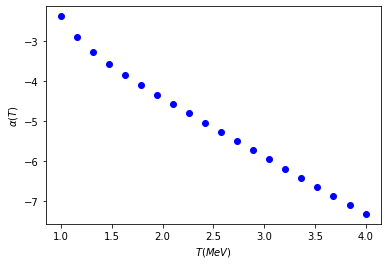

In [191]:


plt.plot(T, alfas, 'bo', )
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\alpha(T)$')
plt.savefig('alfa.pdf')


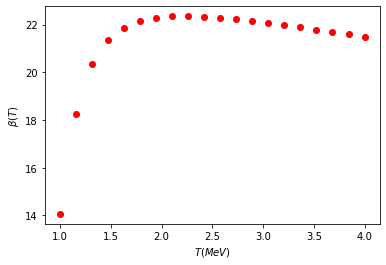

In [192]:
plt.plot(T, betas, 'ro')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\beta(T)$')
plt.savefig('beta.pdf')

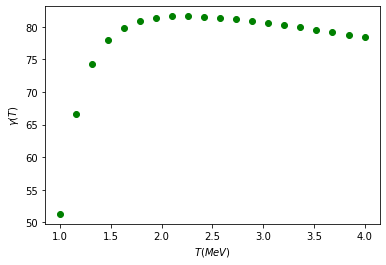

In [193]:
plt.plot(T, gammas, 'go')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\gamma(T)$')
plt.savefig('gamma.pdf')

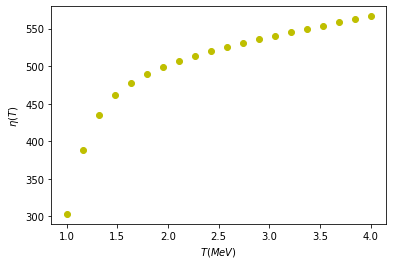

In [194]:
plt.plot(T, etas, 'yo')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\eta(T)$')
plt.savefig('eta.pdf')

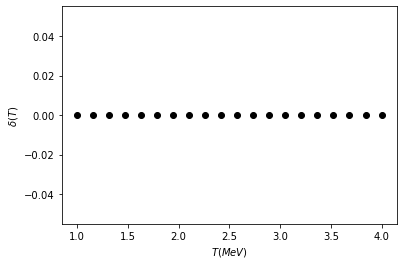

In [195]:
plt.plot(T, deltas, 'ko')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\delta(T)$')
plt.savefig('delta.pdf')

In [139]:

import numpy as np

t = np.array([5000, 4000, 3000, 2000, 1000])

l = t/1000


In [25]:
l

array([5., 4., 3., 2., 1.])

In [26]:
element_file = pd.read_csv('63Zn'+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)
            

In [27]:
element_file

,Z,N,symbol,energy,unc,jp,half-life operator,half_life,unc.1,unit,...,decay %.1,unc.4,decay.2,decay %.2,unc.5,isospin,magn. dipole,unc.6,elect.quadrupole,unc.7
0,Z,N,symbol,energy,unc,jp,half-life operator,half_life,unc,unit,...,decay %,unc,decay,decay %,unc,isospin,magn. dipole,unc,elect. quadrupole,unc
1,30,33,Zn,0,,3/2-,,38.47,5,m,...,,,,,,,-0.28164,,0.29,
2,30,33,Zn,192.92,0.04,5/2-,,0.53,12,ns,...,,,,,,,,,,
3,30,33,Zn,247.84,0.05,1/2-,,33,8,ps,...,,,,,,,,,,
4,30,33,Zn,627.11,0.06,1/2-,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,30,33,Zn,7200,,(5/2 7/2)-,,,,,...,,,,,,,,,,
70,30,33,Zn,7610.8,1.2,25/2-,,,,,...,,,,,,,,,,
71,30,33,Zn,7927,1.3,27/2(-),,,,,...,,,,,,,,,,
72,30,33,Zn,9096.8,1.6,(29/2-),,,,,...,,,,,,,,,,


In [28]:
element_file['energy'] = pd.to_numeric(element_file['energy'], errors='coerce')

In [29]:
element_file.dropna(subset = ['energy'], inplace=True) 

In [30]:
type(element_file['energy'][2:])

pandas.core.series.Series

In [33]:
element_file['energy'][2:]


3      247.84
4      627.11
5      637.07
6      650.10
7     1023.22
       ...   
69    7200.00
70    7610.80
71    7927.00
72    9096.80
73    9774.00
Name: energy, Length: 71, dtype: float64

In [34]:
element_file['energy'][2:].to_numpy()

array([ 247.84,  627.11,  637.07,  650.1 , 1023.22, 1063.34, 1065.28,
       1206.38, 1284.26, 1395.44, 1420.  , 1436.26, 1664.86, 1691.22,
       1702.96, 1704.  , 1860.84, 1909.26, 1978.4 , 2050.42, 2158.1 ,
       2233.3 , 2249.2 , 2261.53, 2288.31, 2291.46, 2293.  , 2318.8 ,
       2377.86, 2403.28, 2521.14, 2584.5 , 2600.1 , 2609.1 , 2634.53,
       2690.9 , 2750.7 , 2826.2 , 2850.  , 2911.9 , 2933.5 , 2940.  ,
       3010.  , 3380.  , 3480.3 , 3527.4 , 3762.8 , 3769.7 , 3890.9 ,
       4000.  , 4320.  , 4354.6 , 4800.  , 4902.2 , 5076.3 , 5346.5 ,
       5400.  , 5405.9 , 5423.4 , 5915.7 , 6000.  , 6233.8 , 6300.  ,
       6487.3 , 6570.  , 6700.  , 7200.  , 7610.8 , 7927.  , 9096.8 ,
       9774.  ])

In [35]:
element_file['energy'][2:]/1000

3     0.24784
4     0.62711
5     0.63707
6     0.65010
7     1.02322
       ...   
69    7.20000
70    7.61080
71    7.92700
72    9.09680
73    9.77400
Name: energy, Length: 71, dtype: float64

In [37]:
element_file['energy'][element_file['energy'].shape[0]]

9774.0

In [38]:
def z_1d( E, T ):
    ''' Derivada de la primera parte de la función de partición'''
    
    suma = 0
    
    for e in E:
        suma += e * np.exp(-e/T)
        
    return suma

In [44]:
z_1d(element_file['energy'][2:]/1000, 4)

86.60101906075008

In [97]:

def cuadrado(x, a):
    
    return a*x**2

sol = quad(cuadrado, 0, 2, args=(1))


In [98]:
sol

(2.666666666666667, 2.960594732333751e-14)